[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/irenebernardi/filters/blob/master/morlet_FIR.ipynb)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fftpack
import scipy
import scipy.io as sio
import copy
from scipy import signal as sig

In [ ]:
solution = sio.loadmat('/Users/ib/udemy_sp/sigprocMXC_wavelets/wavelet_codeChallenge.mat')

In [ ]:
# what does array look like?
print(solution['srate'].shape)
# (1,1) so one row, one column, a single element
#we want to access the only element in this 2d array
srate = solution['srate'][0][0]  # sampling frequency
print(srate)

(1, 1)
2048


In [ ]:
#now lets check signals
print(solution['signal'].shape)
print(solution['signalFIR'].shape)
print(solution['signalMW'].shape)

(12288, 1)
(12288, 1)
(12288, 1)


Let's take the actual signals, rememeber to flatten them!
otherwise when you do fft, the fft will be applied to the second column or smth like that


In [ ]:
signal = solution['signal'].flatten()
signalFIR = solution['signalFIR'].flatten()
signalMW = solution['signalMW'].flatten()

# Making time vector
- Create an array of integers from 0 to the number of points in the signal minus one. This represents the sample indices.
- Divide this array by the sampling rate to convert from sample indices to time.

In [ ]:
sample_indices = np.arange(0, len(solution['signal'])) #still dont get if need - 1
timevec = sample_indices / srate
timevec

array([0.00000000e+00, 4.88281250e-04, 9.76562500e-04, ...,
       5.99853516e+00, 5.99902344e+00, 5.99951172e+00])

# Time domain plots of signal and filters to replicate

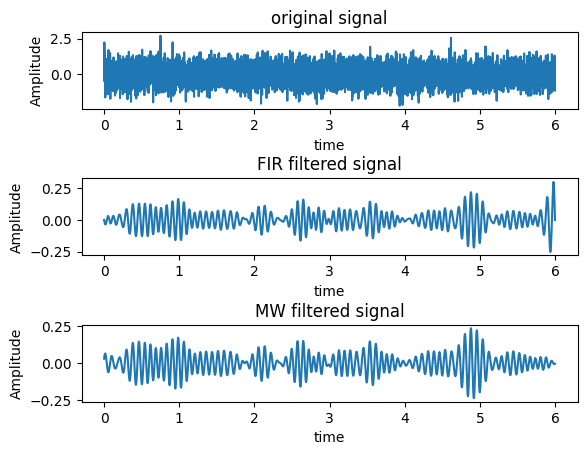

In [ ]:
plt.subplot(311)
plt.plot( timevec, signal)
plt.title('original signal')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.subplot(312)
plt.plot( timevec, signalFIR)
plt.title('FIR filtered signal')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.subplot(313)
plt.plot( timevec, signalMW)
plt.title('MW filtered signal')
plt.xlabel('time')
plt.ylabel('Amplitude')

#adjust the space between the subplots
plt.subplots_adjust(hspace = 0.9)

# To determine which frequencies to pass in filters, lets look at spectral components

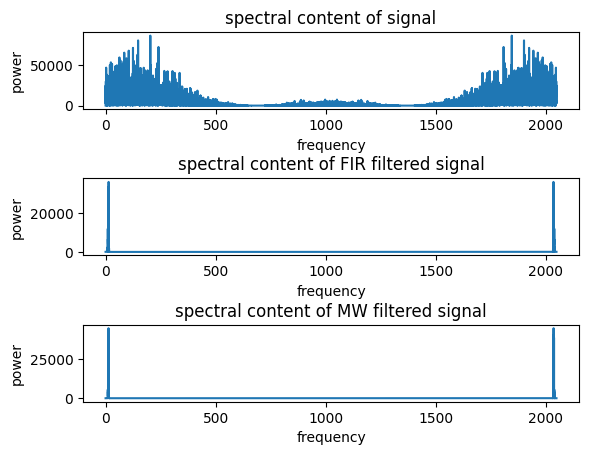

In [ ]:
# ffts of signal and filtered signals
fft_signal = np.abs(fftpack.fft(signal))**2 #squared because we want power
fft_signalFIR = np.abs(fftpack.fft(signalFIR))**2
fft_signalMW =  np.abs(fftpack.fft(signalMW))**2
n_points = len(fft_signal)

# freq axis
N = int(srate// 2)
#freq_axis=np.linspace(0, N, n_points) #non puo partire da freq negative!
freq_axis = np.linspace(0,srate, n_points)
#plots of power spectrum

plt.subplot(311)
plt.plot(freq_axis, fft_signal)
plt.xlabel('frequency')
plt.ylabel('power')
plt.title('spectral content of signal')
plt.subplot(312)
plt.plot(freq_axis, fft_signalFIR)
plt.title('spectral content of FIR filtered signal')
plt.xlabel('frequency')
plt.ylabel('power')
plt.subplot(313)
plt.plot(freq_axis, fft_signalMW)
plt.title('spectral content of MW filtered signal')
plt.xlabel('frequency')
plt.ylabel('power')
plt.subplots_adjust(hspace = 0.9)

see frequencies are focused around 0 (ignore double frex bc fft?)

Anyhow if we zoom in (xlim) we can see which freqs are actually let through by the filter:

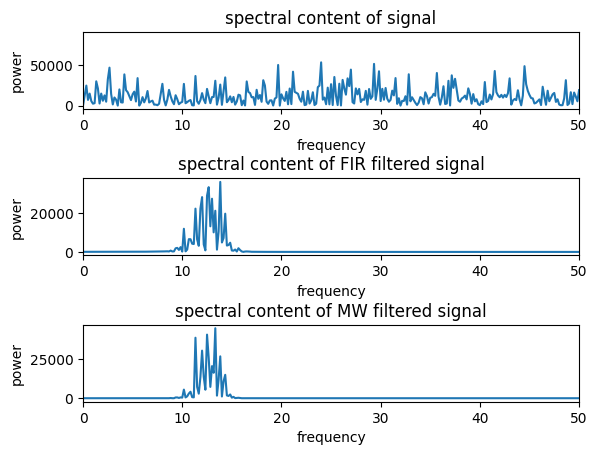

In [ ]:
plt.subplot(311)
plt.plot(freq_axis, fft_signal)
plt.xlabel('frequency')
plt.ylabel('power')
plt.title('spectral content of signal')
plt.xlim(0,50)
plt.subplot(312)
plt.plot(freq_axis, fft_signalFIR)
plt.title('spectral content of FIR filtered signal')
plt.xlabel('frequency')
plt.ylabel('power')
plt.xlim(0,50)
plt.subplot(313)
plt.plot(freq_axis, fft_signalMW)
plt.title('spectral content of MW filtered signal')
plt.xlabel('frequency')
plt.ylabel('power')
plt.xlim(0,50)
plt.subplots_adjust(hspace = 0.9)

# Question
# why does setting freq axis to freq_axis=np.linspace(0, N, n_points) SHIFT BACK THE FILTERED FREQS? look:

In [ ]:
#Question
#why does setting freq axis to freq_axis=np.linspace(0, N, n_points) SHIFT BACK THE FILTERED FREQS?

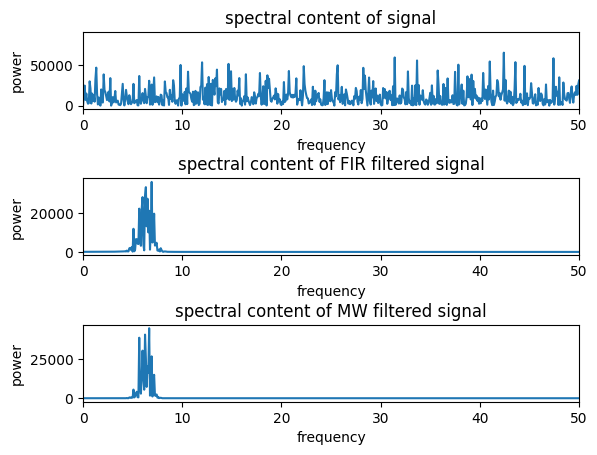

In [ ]:
freq_axis=np.linspace(0, N, n_points)
plt.subplot(311)
plt.plot(freq_axis, fft_signal)
plt.xlabel('frequency')
plt.ylabel('power')
plt.title('spectral content of signal')
plt.xlim(0,50)
plt.subplot(312)
plt.plot(freq_axis, fft_signalFIR)
plt.title('spectral content of FIR filtered signal')
plt.xlabel('frequency')
plt.ylabel('power')
plt.xlim(0,50)
plt.subplot(313)
plt.plot(freq_axis, fft_signalMW)
plt.title('spectral content of MW filtered signal')
plt.xlabel('frequency')
plt.ylabel('power')
plt.xlim(0,50)
plt.subplots_adjust(hspace = 0.9)

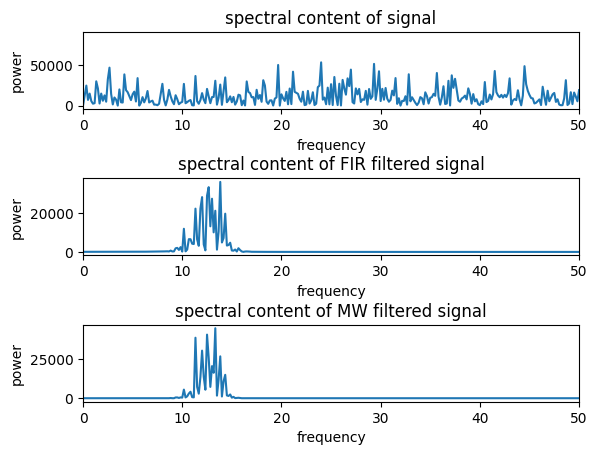

In [ ]:

freq_axis = np.linspace(0,srate, n_points)
plt.subplot(311)
plt.plot(freq_axis, fft_signal)
plt.xlabel('frequency')
plt.ylabel('power')
plt.title('spectral content of signal')
plt.xlim(0,50)
plt.subplot(312)
plt.plot(freq_axis, fft_signalFIR)
plt.title('spectral content of FIR filtered signal')
plt.xlabel('frequency')
plt.ylabel('power')
plt.xlim(0,50)
plt.subplot(313)
plt.plot(freq_axis, fft_signalMW)
plt.title('spectral content of MW filtered signal')
plt.xlabel('frequency')
plt.ylabel('power')
plt.xlim(0,50)
plt.subplots_adjust(hspace = 0.9)

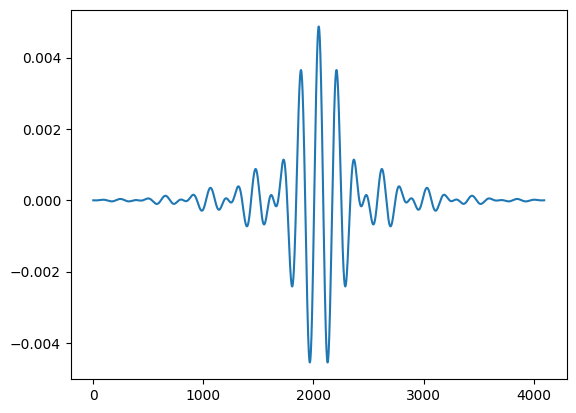

In [ ]:
# comunque per ora lets do 10-15
frange = [10,15]
transw = 0.01
nyquist = srate/2
order = int(20*srate/frange[0])

#filter must be odd: TODO figure out why
if order % 2 ==0:
    #order = order + 1
    order += 1

shape = [0,0,1,1,0,0]
frex  = [ 0, frange[0]-frange[0]*transw, frange[0], frange[1], frange[1]+frange[1]*transw, nyquist ]
filtkern = sig.firwin(order, frange, fs=srate, pass_zero=False)

plt.plot(filtkern)

(0.0, 40.0)

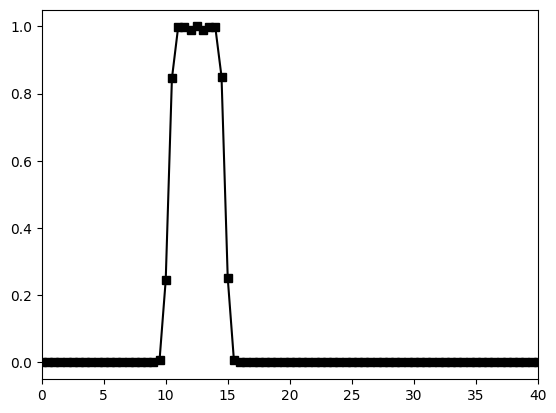

In [ ]:
# check frequency response
#TODO understand this code

# compute the power spectrum of the filter kernel
filtpow = np.abs(scipy.fft.fft(filtkern))**2
# compute the frequencies vector and remove negative frequencies
hz      = np.linspace(0,srate/2,int(np.floor(len(filtkern)/2)+1))
filtpow = filtpow[0:len(hz)]

# plot amplitude spectrum of the filter kernel
plt.plot(hz,filtpow,'ks-',label='Actual')
plt.xlim([0,frange[0]*4])

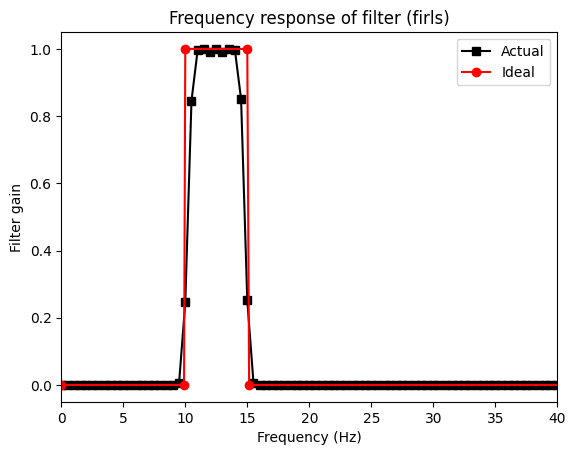

In [ ]:
# plot amplitude spectrum of the filter kernel
plt.plot(hz,filtpow,'ks-',label='Actual')
plt.plot(frex,shape,'ro-',label='Ideal')
plt.xlim([0,frange[0]*4])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firls)')
plt.show()

DECREASING TRANS WIDTH BY A LOT MADE IT TIGHTER AROUND THE FREQS OF INTEREST BUT I STILL NEED TO REVISE WHAT THIS FREQ RESPONSE COMPARISON ACT LOOKS LIKE

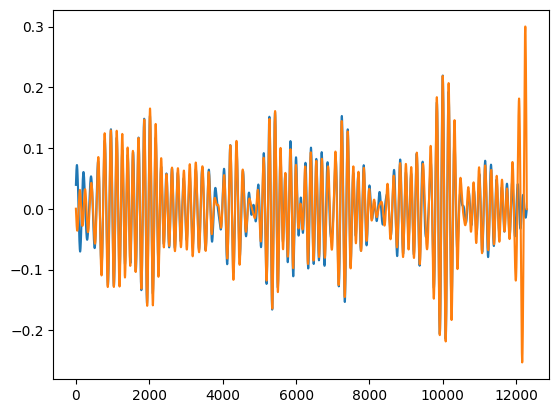

In [ ]:
cleanfir = np.convolve(signal, filtkern, 'same')
plt.plot(cleanfir)
plt.plot(signalFIR)


In [ ]:
len(signalFIR)
len(cleanfir)

12288

(0.0, 50.0)

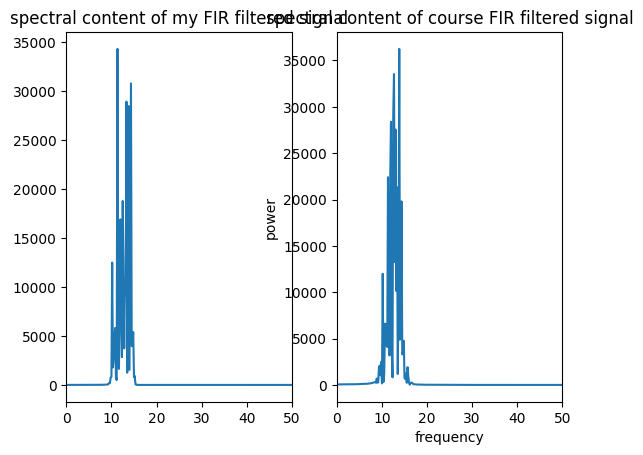

In [ ]:
#power
fft_cleanfir = np.abs(fftpack.fft(cleanfir))**2
plt.subplot(121)
plt.plot(freq_axis, fft_cleanfir)
plt.title('spectral content of my FIR filtered signal')
plt.xlim(0,50)
plt.subplot(122)
plt.plot(freq_axis, fft_signalFIR)
plt.title('spectral content of course FIR filtered signal')
plt.xlabel('frequency')
plt.ylabel('power')
plt.xlim(0,50)

now morlet wavelet, sempre letting through 10-15 Hz

In [ ]:
len(timevec)

12288

In [ ]:
timevec = timevec - np.mean(timevec)

# parameters
freq = 12 # peak frequency
csw  = np.cos(2*np.pi*freq*timevec) # cosine wave
fwhm = .5 # full-width at half-maximum in seconds
gaussian = np.exp( -(4*np.log(2)*timevec**2) / fwhm**2 ) # Gaussian

# Morlet wavelet
MorletWavelet = csw * gaussian

Why do the time domain morlet plots look so weird? |

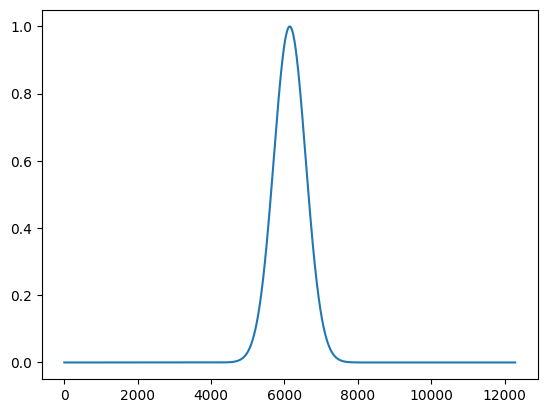

In [ ]:
plt.plot(gaussian)

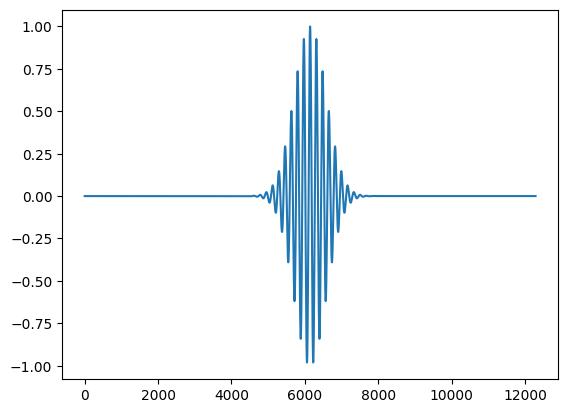

In [ ]:
plt.plot(MorletWavelet)

# im not sure which params to change here to make the morlet wavelet match the necessary power criteria

lets plot it in freq domain for clarity

In [ ]:
len(MorletWavelet)

12288

(0.0, 50.0)

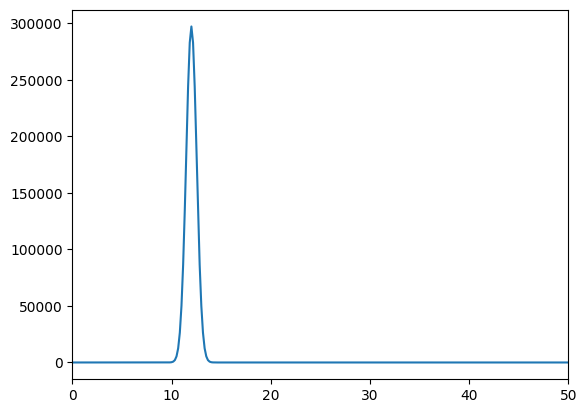

In [ ]:
power_morlet = np.abs(fftpack.fft(MorletWavelet))**2
plt.plot(freq_axis, power_morlet)
plt.xlim(0,50)

In [ ]:
len(MorletWavelet)

12288

So i think the key is changing the peak frequency?

TODO remind yourself why convolve is only used for time domain filtering and not frequency domain filtering? what is done in frequency domain then?

In [ ]:
len(MorletWavelet)


12288

In [ ]:
assert len(signal) == len(MorletWavelet)

Text(0.5, 1.0, 'my mw in time domain')

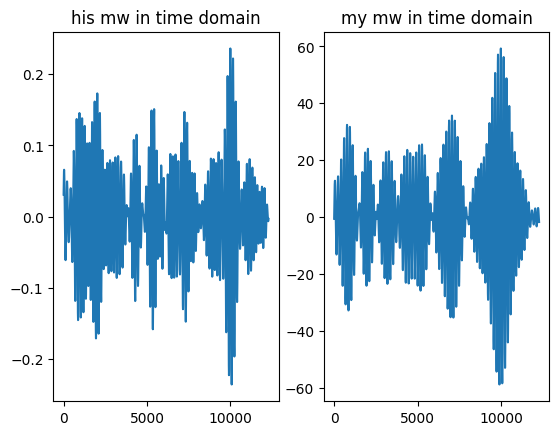

In [ ]:
# try cleaning code in time domain
cleanfilter_morlet = np.convolve(signal, MorletWavelet, 'same')

plt.subplot(121)
plt.plot(signalMW)
plt.title('his mw in time domain') #course filter
plt.subplot(122)
plt.plot(cleanfilter_morlet)
plt.title('my mw in time domain') #my filter



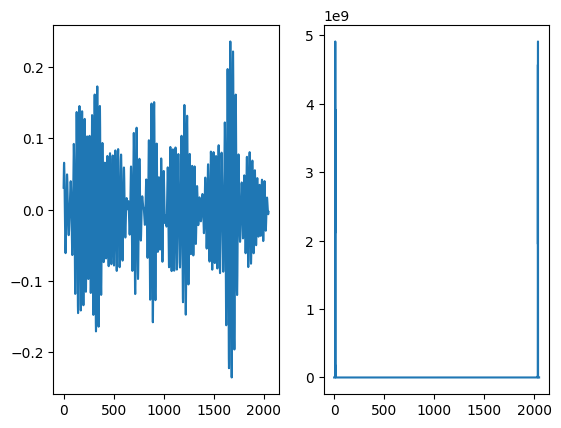

In [ ]:
#shouldnt multiplication in freq domain give me same result?
cleanfilter_morlet_power = fft_signal * power_morlet

#now this should be the same as power spectrum of his signal cleaned with morlet
plt.subplot(121)
plt.plot(freq_axis, signalMW)
plt.subplot(122)
plt.plot(freq_axis, cleanfilter_morlet_power)


(0.0, 50.0)

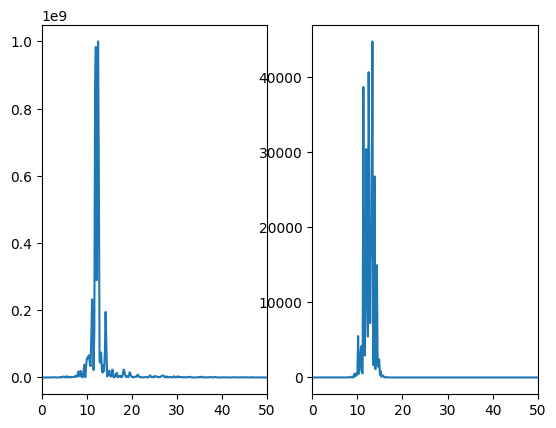

In [ ]:
fft_cleanmw = np.abs(fftpack.fft(cleanfilter_morlet))**2
plt.subplot(121)
plt.plot(freq_axis, fft_cleanmw)
plt.xlim(0,50)
plt.subplot(122)
plt.plot(freq_axis, fft_signalMW)
plt.xlim(0,50)

(0.0, 50.0)

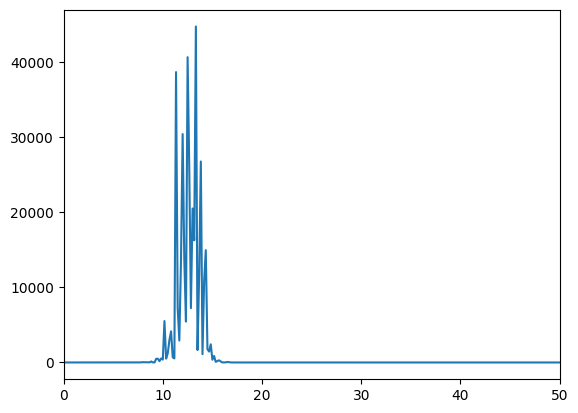

In [ ]:
plt.plot(freq_axis, fft_signalMW)
plt.xlim(0,50)

(0.0, 50.0)

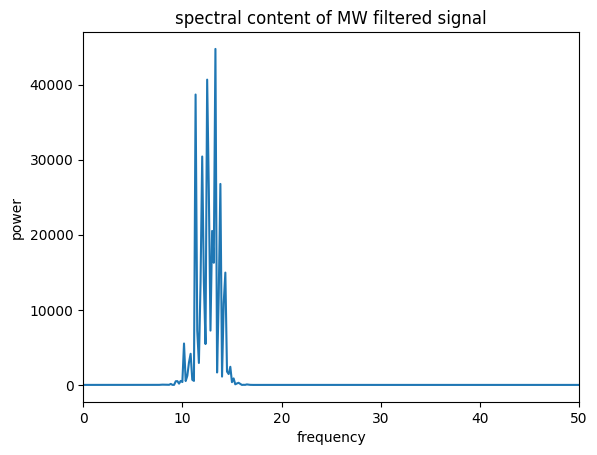

In [ ]:
plt.plot(freq_axis, fft_signalMW)
plt.title('spectral content of MW filtered signal')
plt.xlabel('frequency')
plt.ylabel('power')
plt.xlim(0,50)